In [2]:
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

print(platform.platform())

Linux-6.8.0-1030-azure-x86_64-with-glibc2.39


In [14]:
from sklearn.neighbors import KNeighborsRegressor

random = np.random.default_rng(3)

xs = np.linspace(-10, 10, 100)
평균, 편차 = 0, 1
noise = random.normal(평균, 편차, xs.shape)
ys = xs + noise
data = xs.reshape(-1, 1)
print(xs.shape, data.shape)
target = ys
model = KNeighborsRegressor(n_neighbors=3)
model.fit(data, target)


(100,) (100, 1)


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [15]:
예측 = model.predict(data)
print(pd.DataFrame({
    'target': target,
    '예측': 예측,
    '오차': target - 예측
}).head(5).round(2))

   target     예측    오차
0   -7.96  -9.83  1.87
1  -12.35  -9.83 -2.52
2   -9.18 -10.50  1.32
3   -9.96  -9.59 -0.37
4   -9.64  -9.60 -0.04


In [16]:
def r2_score(y_true, y_pred):
    오차 = y_true - y_pred
    편차 = y_true - np.mean(y_true)
    return 1-(np.sum(오차**2)/np.sum(편차**2))

In [20]:
error = target - 예측
정답평균 = np.mean(target)
scores = {}
scores['MAE'] = {
    'best': np.mean(np.abs(target - target)),
    'model': np.mean(np.abs(error)),
    'baseline': np.mean(np.abs(target - 정답평균))
}
scores['R2'] = {
    'best': r2_score(target, target),
    'model': r2_score(target, 예측),
    'baseline': r2_score(target, 정답평균),
    'reverse': r2_score(target, -target)
}
print(pd.DataFrame(scores).round(2))

           MAE    R2
best      0.00  1.00
model     0.73  0.97
baseline  5.04  0.00
reverse    NaN -3.00


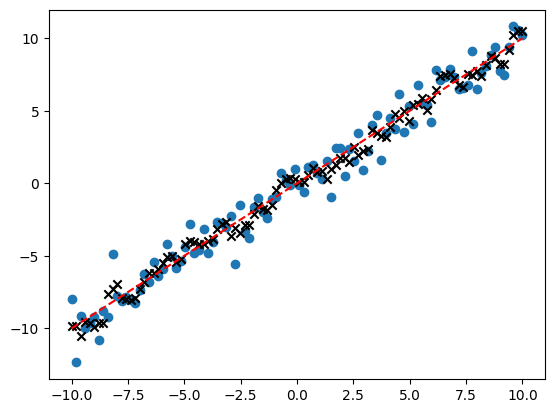

In [21]:
plt.scatter(xs, ys)
plt.plot(xs, ys - noise, color='red', linestyle='--')
plt.scatter(xs, model.predict(data), color='black', marker='x')
plt.show()